<a href="https://colab.research.google.com/github/armandordorica/Advanced-Python/blob/master/gradient_boosted_tree_annotated_Armando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

### Bagging 
Bagging solves for **classifiers with a variance problem**. This can be shown when your training error is much lower than your testing error. What you do with bagging is to sample a bunch of training data sets with replacement and you train a classifier with each one of them and you take the average. This reduces the variance and does not increase bias, so your testing error goes down. 

### What are weak learners? 
They cannot learn and bring your training error down to zero. Strong learners can.  

### How do we define a weak learner? 
A splitter that performs better than a coin toss (better than guessing). 

### Boosting 
This is what you do** when you have a bias problem**. The idea of boosting is to combine weak learners in a way to get zero training error. 

Add a new weak learner, add it to an ensemble and go on and on until you're not getting any more value.  

Adaboost reduces bias and is surprisingly resistant to variance (it does not increase it). 

### Intuition
If I have an algorithm that gives me lousy predictions, can I combine them in a way that I can actually get closer and closer to the actual value?

We start out and train our classifier $H$ on our training data and because it's not very good, it will give us a point far away from our target value $y$. 

Gradient descent is like walking home very drunk. You know you'll eventually get home but each individual step is very bad. However, when you sum up a bunch of bad steps in the right direction you eventually get there. 
The size of your steps is analogous to the learning rate. 

### Gradient Boosted Trees in practice
This is what search engines use. 
* CART Trees can minimize entropy, gini impurity or squareloss. 

### Notes on Implementation 
* Default parameters of Gradient Boosting on `sklearn`
  * learning rate $\alpha=0.1$
  * `n_estimators` = number of trees to use = 100
  * `max_depth`= 3 


Perfect accuracy on training set indicates tha model is likely overfitting (high variance). You can decrease the learning rate $\alpha$ and/or the `max_depth` parameters to fix this.  

 ### Pros 
 * Often best-off-the-shelf accuracy on many problems
 * Using model for predition requires only modest memory and is fast. 
 * Doesn't require careful normalizaiion of features to perform well. 
 * Like decision trees, handles a mixture of feature types 

 ### Cons 
 * Like Random Forests, the models are often difficult for humans to interpret. 
 * Requires careful tuning of the learning rate and other parameters 
 * Training can require significant computation 
 * Like decision Trees, not recommended fo text classifiction and other problems with vry high dimensional sparse features, for accuracy, and computational cost reasons. 

### Preprocessing

In [6]:
cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


In [7]:
ls

anscombe.json*                loans_data_encoded.csv  README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


Data has been normalized/standardized with categories encoded alreay using the `sklearn.preprocessing StandardScaler`. 

In [8]:
# Load data
# file_path = Path("loans_data_encoded.csv")
loans_df = pd.read_csv('loans_data_encoded.csv')
loans_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [9]:
len(loans_df.columns)
# 10 variables in the feature vector X 
# 1 variable in the target vector y 

11

In [10]:
loans_df.groupby(['bad']).count()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
bad,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300
1,200,200,200,200,200,200,200,200,200,200


In [11]:
# Define features set
X = loans_df.copy(deep=True)
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [12]:
# Define target vector
y = loans_df["bad"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [13]:
len(X), len(y)

(500, 500)

In [14]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0)

#75% to 25% default train to test split 

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
len(X_train)

375

### Choose best learning rate

In [16]:
# Iterate over learning rate to identify the best classifier learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]


### Create Gradient Boosting Classifier

In [17]:
# Create a classifier object

test_accuracies = []
train_accuracies = []

for learning_rate in learning_rates:
  classifier = GradientBoostingClassifier(
  n_estimators=100,
  learning_rate=learning_rate,
  max_depth=3,
  max_features=5,
  # subsample=0.8,
  random_state=0
  )
  # Fit the model
  classifier.fit(X_train_scaled, y_train.ravel())
  print("Learning rate: ", learning_rate)

  train_accuracy = classifier.score(X_train_scaled, y_train.ravel())
  print("Accuracy score (training):{0:.3f}".format(train_accuracy))

  train_accuracies.append(train_accuracy)

  test_accuracy = classifier.score(X_test_scaled, y_test.ravel())
  test_accuracies.append(test_accuracy)
  print("Accuracy score (validation):{0:.3f}".format(classifier.score(X_test_scaled, y_test.ravel())))
  print()


Learning rate:  0.05
Accuracy score (training):0.717
Accuracy score (validation):0.544

Learning rate:  0.1
Accuracy score (training):0.765
Accuracy score (validation):0.544

Learning rate:  0.25
Accuracy score (training):0.827
Accuracy score (validation):0.528

Learning rate:  0.5
Accuracy score (training):0.883
Accuracy score (validation):0.504

Learning rate:  0.75
Accuracy score (training):0.925
Accuracy score (validation):0.520

Learning rate:  1
Accuracy score (training):0.933
Accuracy score (validation):0.488



In [18]:
dict = {'Learning Rate':learning_rates, 'Train Accuracy':train_accuracies, 'Test Accuracy': test_accuracies}
tuning_df = pd.DataFrame(dict)
tuning_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
best_learning_rate= tuning_df['Learning Rate'].iloc[0]

tuning_df

,Learning Rate,Train Accuracy,Test Accuracy
0,0.05,0.717333,0.544
1,0.10,0.765333,0.544
2,0.25,0.826667,0.528
4,0.75,0.925333,0.520
3,0.50,0.882667,0.504
5,1.00,0.933333,0.488


In [19]:
tuning_df.sort_values(by='Learning Rate', ascending=True, inplace=True)
tuning_df

,Learning Rate,Train Accuracy,Test Accuracy
0,0.05,0.717333,0.544
1,0.10,0.765333,0.544
2,0.25,0.826667,0.528
3,0.50,0.882667,0.504
4,0.75,0.925333,0.520
5,1.00,0.933333,0.488


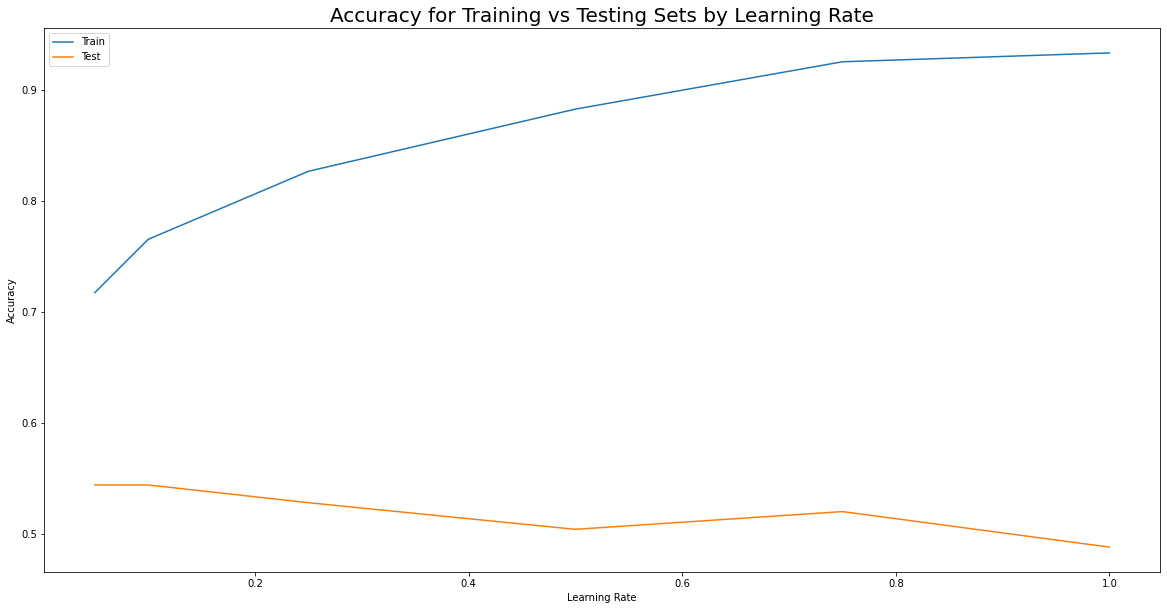

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(tuning_df['Learning Rate'], tuning_df['Train Accuracy'], label='Train')
plt.plot(tuning_df['Learning Rate'], tuning_df['Test Accuracy'], label='Test')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy for Training vs Testing Sets by Learning Rate", fontsize=20)
plt.legend()

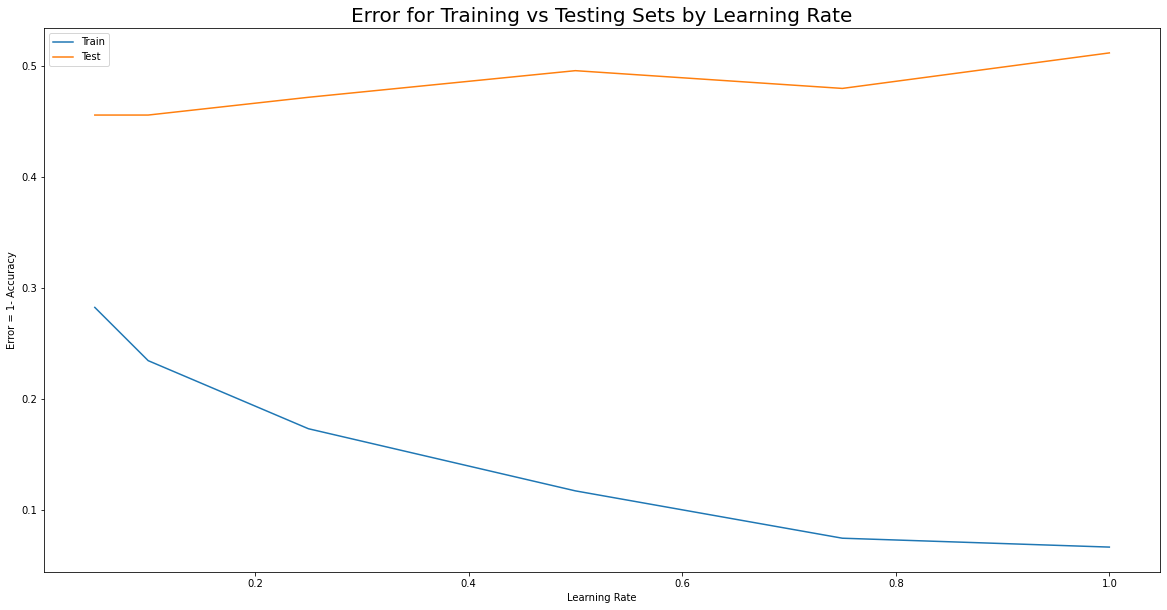

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(tuning_df['Learning Rate'], 1-tuning_df['Train Accuracy'], label='Train')
plt.plot(tuning_df['Learning Rate'], 1-tuning_df['Test Accuracy'], label='Test')
plt.xlabel("Learning Rate")
plt.ylabel("Error = 1- Accuracy")
plt.title("Error for Training vs Testing Sets by Learning Rate", fontsize=20)
plt.legend()

In [22]:

# Choose a learning rate and create the classifier

# Fit the model

clf = GradientBoostingClassifier(n_estimators=100, max_features=5, learning_rate=best_learning_rate, max_depth=3, random_state=0)
clf.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = clf.predict(X_test_scaled)

pd.DataFrame({'Prediction':predictions, "Actual":y_test.ravel()}).head(20)


,Prediction,Actual
0,0,0
1,0,0
2,1,0
3,0,1
4,0,1
5,0,0
6,0,1
7,0,1
8,1,0
9,0,0


### Evaluate the model

In [23]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy score: {acc_score}")

Accuracy score: 0.544


In [24]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cm_df

,Predicted 0,Predicted 1
Actual 0,60,13
Actual 1,44,8


In [25]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.82      0.68        73
           1       0.38      0.15      0.22        52

    accuracy                           0.54       125
   macro avg       0.48      0.49      0.45       125
weighted avg       0.50      0.54      0.49       125



### Visualize the decision tree

In [26]:
# Graph tree
dot_data = tree.export_graphviz(
    clf.estimators_[9,0],
    out_file =None, filled=True, 
    rounded=True, 
    special_characters=True, 
    proportion = True,
 )

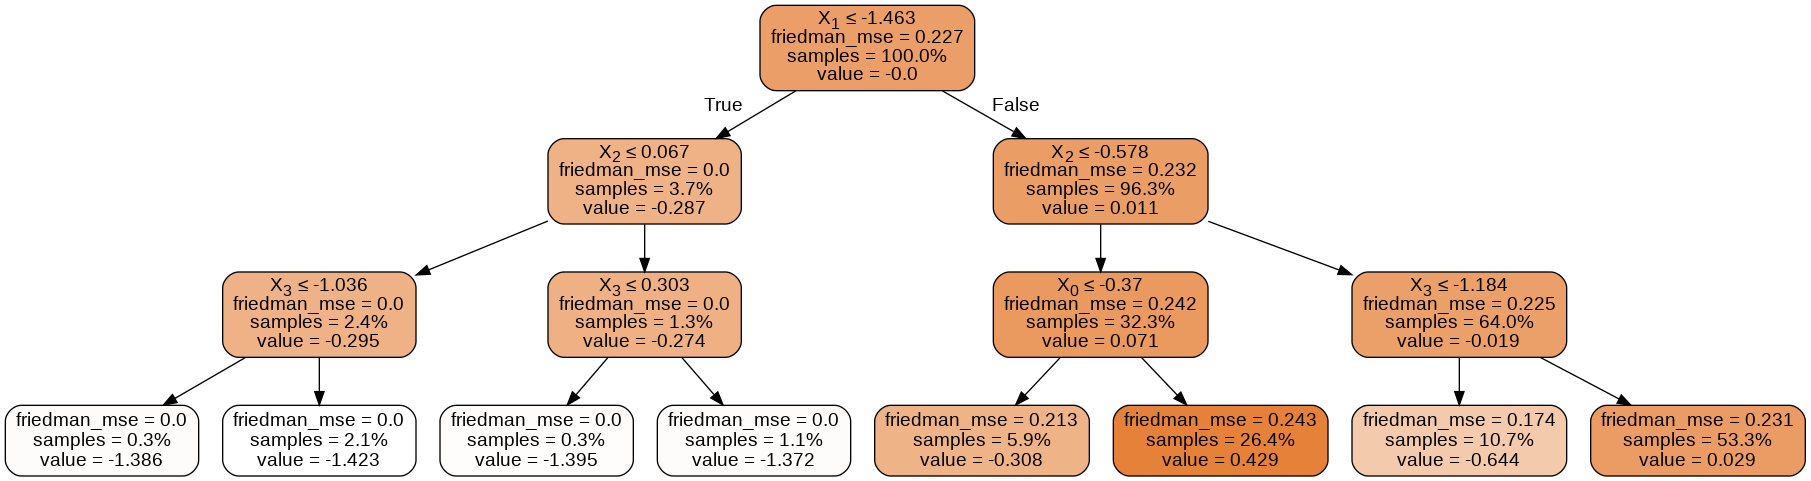

In [27]:
graph  = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [28]:
clf.n_estimators

100

In [30]:
# from sklearn import tree
# text_representation = tree.export_text(clf.estimators_[17])

# for i in range( len(X.columns)-1, 0, -1): 
#     text_representation = text_representation.replace("feature_{}".format(i), X.columns[i])
#     print("feature_{}".format(i), X.columns[i])
    
# print(text_representation)